# Tutorial: water level data

In [1]:
import dew_gwdata as gd

In [2]:
db = gd.sageodata()

In [3]:
wells = db.find_wells("lkw040 lkw64 5928-201,602802321")

In [ ]:
wells

['5928-201', 'LKW040', '6028-2321', 'LKW064']

This is an sa_gwdata.Wells object, which closely mimics a Python list. 
It contains sa_gwdata.Well objects - see [more information here](https://python-sa-gwdata.readthedocs.io/en/latest/python.html#sa_gwdata.Well).
                                                                     
Now let's get a summary of details about these wells using a one of dew_gwdata's predefined SA Geodata queries "drillhole_details"

All the predefined queries are [documented here](file:///P:/projects_gw/State/Groundwater_Toolbox/Python/wheels/docs/sageodata_db/latest_source/predefined-queries.html):

P:\Projects_GW\State\Groundwater_Toolbox\Python\wheels\docs\sageodata_db\latest_source\predefined-queries.html

In [5]:
df = db.drillhole_details(wells)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   well_id      4 non-null      object 
 1   dh_no        4 non-null      int64  
 2   unit_long    4 non-null      int64  
 3   unit_hyphen  4 non-null      object 
 4   obs_no       2 non-null      object 
 5   dh_name      2 non-null      object 
 6   easting      4 non-null      float64
 7   northing     4 non-null      float64
 8   zone         4 non-null      int64  
 9   latitude     4 non-null      float64
 10  longitude    4 non-null      float64
 11  aquifer      2 non-null      object 
 12  pwa          3 non-null      object 
 13  pwra         0 non-null      object 
dtypes: float64(4), int64(3), object(7)
memory usage: 576.0+ bytes


Predefined queries usually need you to supply a list of drillhole numbers as the argument, so for example we are going to use the predefined query "water_levels":

In [6]:
wls = db.water_levels(df.dh_no)

In [7]:
wls

,well_id,dh_no,unit_long,unit_hyphen,obs_no,dh_name,easting,northing,zone,latitude,...,anomalous_ind,pumping_ind,measured_during,datasource,comments,wl_meas_no,created_by,creation_date,modified_by,modified_date
0,5928-201,7205,592800201,5928-201,None,None,545780.36,6168904.38,53,-34.620707,...,N,N,U,DEWNR,None,3381,DHDB,1997-07-02 18:24:20,DHDB,2022-03-04 09:05:39
1,LKW040,7310,592800306,5928-306,LKW040,CB TWS INVESTIGATION 3,544296.75,6167305.54,53,-34.635190,...,N,N,D,DEWNR,None,507114,GAACL,1998-12-08 10:34:27,DHDB,2022-03-04 09:06:21
2,LKW040,7310,592800306,5928-306,LKW040,CB TWS INVESTIGATION 3,544296.75,6167305.54,53,-34.635190,...,N,N,M,DEWNR,None,195880,DHDB,1997-07-02 18:55:53,DHDB,2022-03-04 09:05:51
3,LKW040,7310,592800306,5928-306,LKW040,CB TWS INVESTIGATION 3,544296.75,6167305.54,53,-34.635190,...,N,N,M,DEWNR,None,195881,DHDB,1997-07-02 18:55:53,DHDB,2022-03-04 09:06:12
4,LKW040,7310,592800306,5928-306,LKW040,CB TWS INVESTIGATION 3,544296.75,6167305.54,53,-34.635190,...,N,N,M,DEWNR,None,195882,DHDB,1997-07-02 18:55:53,DHDB,2022-03-04 09:05:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LKW064,283736,592800459,5928-459,LKW064,COFFIN BAY 2,545648.71,6168123.45,53,-34.627755,...,N,N,M,SA_WATER,None,1287127,MHUTCHESSON,2022-12-12 15:01:54,None,NaT
377,LKW064,283736,592800459,5928-459,LKW064,COFFIN BAY 2,545648.71,6168123.45,53,-34.627755,...,N,N,M,SA_WATER,None,1288172,MHUTCHESSON,2023-01-25 09:40:07,None,NaT
378,LKW064,283736,592800459,5928-459,LKW064,COFFIN BAY 2,545648.71,6168123.45,53,-34.627755,...,N,N,M,SA_WATER,None,1289272,MHUTCHESSON,2023-02-24 15:58:29,None,NaT
379,LKW064,283736,592800459,5928-459,LKW064,COFFIN BAY 2,545648.71,6168123.45,53,-34.627755,...,N,N,M,SA_WATER,None,1289669,MHUTCHESSON,2023-03-07 11:46:09,None,NaT


As you can see looking at the returned dataframe is a bit hard because the various well ID columns take up the view. You can remove this temporarily using this util function:

In [8]:
wls.pipe(gd.cleanup_columns)

,well_id,obs_date,swl,dtw,rswl,pressure,pressure_unit,sip,sit,temperature,...,anomalous_ind,pumping_ind,measured_during,datasource,comments,wl_meas_no,created_by,creation_date,modified_by,modified_date
0,5928-201,1950-11-01 00:00:00,2.44,2.44,1.87,None,None,None,None,NaN,...,N,N,U,DEWNR,None,3381,DHDB,1997-07-02 18:24:20,DHDB,2022-03-04 09:05:39
1,LKW040,1985-04-02 00:00:00,NaN,2.64,NaN,None,None,None,None,NaN,...,N,N,D,DEWNR,None,507114,GAACL,1998-12-08 10:34:27,DHDB,2022-03-04 09:06:21
2,LKW040,1986-11-07 00:00:00,3.06,3.37,1.28,None,None,None,None,NaN,...,N,N,M,DEWNR,None,195880,DHDB,1997-07-02 18:55:53,DHDB,2022-03-04 09:05:51
3,LKW040,1986-12-02 00:00:00,3.16,3.47,1.18,None,None,None,None,NaN,...,N,N,M,DEWNR,None,195881,DHDB,1997-07-02 18:55:53,DHDB,2022-03-04 09:06:12
4,LKW040,1987-01-02 00:00:00,3.18,3.49,1.16,None,None,None,None,NaN,...,N,N,M,DEWNR,None,195882,DHDB,1997-07-02 18:55:53,DHDB,2022-03-04 09:05:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LKW064,2022-11-10 00:00:00,27.46,27.94,0.54,None,None,None,None,NaN,...,N,N,M,SA_WATER,None,1287127,MHUTCHESSON,2022-12-12 15:01:54,None,NaT
377,LKW064,2022-12-01 00:00:00,27.44,27.92,0.56,None,None,None,None,NaN,...,N,N,M,SA_WATER,None,1288172,MHUTCHESSON,2023-01-25 09:40:07,None,NaT
378,LKW064,2023-01-06 00:00:00,27.51,27.99,0.49,None,None,None,None,NaN,...,N,N,M,SA_WATER,None,1289272,MHUTCHESSON,2023-02-24 15:58:29,None,NaT
379,LKW064,2023-02-02 00:00:00,27.55,28.03,0.45,None,None,None,None,NaN,...,N,N,M,SA_WATER,None,1289669,MHUTCHESSON,2023-03-07 11:46:09,None,NaT


How many water level measurements are there for each well?

In [9]:
wls.groupby("well_id").obs_date.nunique()

well_id
5928-201       1
6028-2321      1
LKW040       359
LKW064        19
Name: obs_date, dtype: int64

How about the first and last?

In [10]:
wls.groupby("well_id").obs_date.agg(["min", "max"])

,min,max
well_id,,
5928-201,1950-11-01,1950-11-01 00:00:00
6028-2321,2004-02-27,2004-02-27 00:00:00
LKW040,1985-04-02,2023-03-02 15:50:38
LKW064,2014-11-30,2023-03-02 16:32:01


And a chart

In [11]:
import matplotlib.pyplot as plt

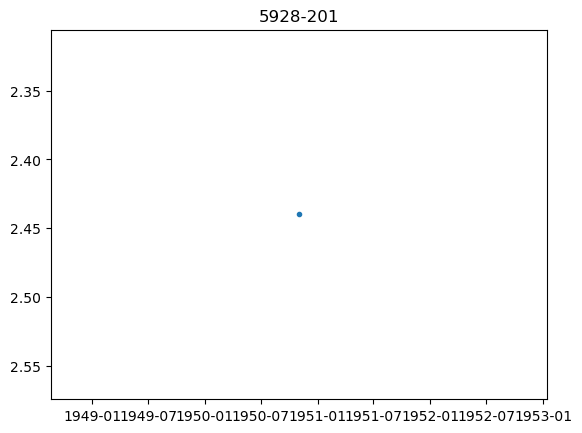

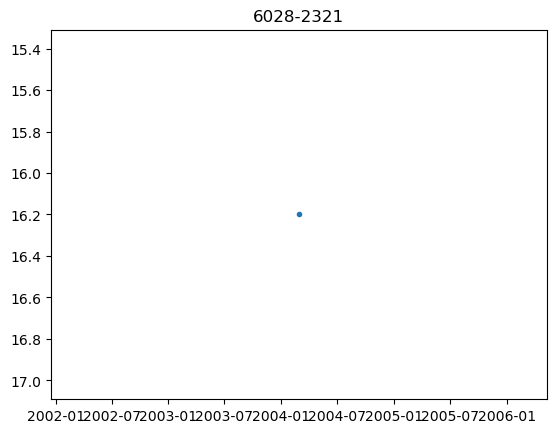

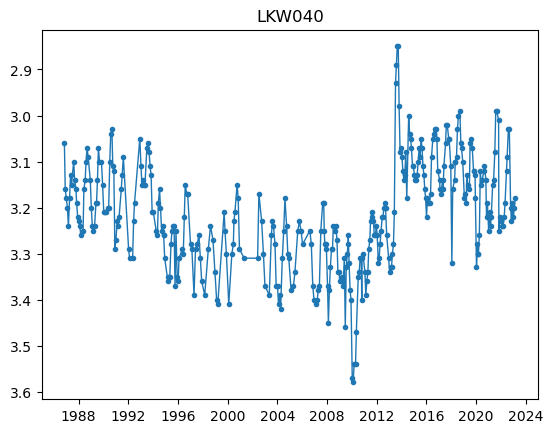

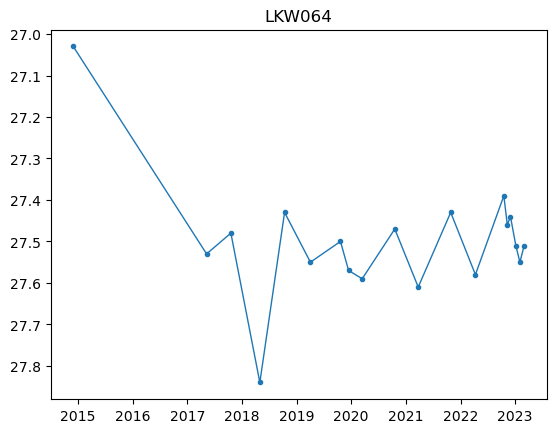

In [12]:
for well_id, wls2 in wls.groupby("well_id"):

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title(well_id)
    ax.plot(wls2.obs_date, wls2.swl, marker='o', lw=1, ms=3)
    ax.invert_yaxis()